# Final Project 
### DATA620 Web Analytics
Daniel Dittenhafer & Justin Hink

Using graph and text analytics, we explore the individuals whom have been (or are expected to be) nominated for positions in President-elect Donald Trump's cabinet. Note: Since a number of these positions have yet to be finalized, these data are changing quite frequently. The project was completed with data current as of Dec 11, 2016.

## Python References

Here we load the required references including networkX version 1.11.

In [1]:
import csv
import collections
import numpy as np

import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt

import networkx as nx
import networkx_helpers as nxh
nx.__version__

'1.11'

## Load Data Set

Here we load the basic data set of cabinet positions and the related nominee information. This data set is based on an [NBC News article, Donald Trump's Cabinet Picks So Far](http://www.nbcnews.com/politics/politics-news/donald-trump-s-cabinet-picks-so-far-n690296) and augmented with follow-on articles through Dec 11, 2016.

In [12]:
imageDest = "../images/"
graphmlDest = "../data/"
dataFile = "../data/TrumpCabinet.csv"
dataset = []
with open( dataFile, "rb" ) as theFile:
    reader = csv.DictReader( theFile )
    for line in reader:
        dataset.append(line)

In [13]:
# Show an example of the loaded data
dataset[1]

{'Cabinet Seat': 'Secretary of Defense',
 'CampaignPosition': '',
 'Citation': '',
 'OrgType': 'Military',
 'Organization': 'U.S. Central Command',
 'PastTrump': '',
 'Person': 'James Mattis',
 'Prior Position': 'General',
 'ReportsTo': 'Donald Trump',
 'Wikipedia': 'https://en.wikipedia.org/wiki/James_Mattis',
 'Wikipedia Org': 'https://en.wikipedia.org/wiki/United_States_Central_Command',
 'twitter': ''}

## Graph Construction

In this section, we convert the raw data into edge sets associated with various graph instances.

In [4]:
def makeGraph(data, src, dest, gx=None):
    """Helper function to construct the graph with node types included."""
    if gx is None:
        gx = nx.Graph()
        
    nodeTypes = {}
    for i in data:
        
        if len(i[src]) > 0 and len(i[dest]) > 0:
            gx.add_edge(i[src],i[dest])
            nodeTypes[i[src]] = src
            nodeTypes[i[dest]] = dest
        else:
            print src, ":", i[src]
            print dest, ":", i[dest]
            
    nx.set_node_attributes (gx, "NodeType", nodeTypes)
    
    return gx

In [37]:
people = []
for i in dataset:
    people.append(i["Person"])
    

gxOrgType = makeGraph(dataset, "Person", "OrgType")

gxPriorPosition = makeGraph(dataset, "Person", "Prior Position")

gxOrganization = makeGraph(dataset, "Person", "Organization")


gxPyramid = makeGraph(dataset, "Cabinet Seat", "ReportsTo") #)
gxPyramid = makeGraph(dataset, "Person", "Cabinet Seat", gx=gxPyramid)

gxCombined = makeGraph(dataset, "Person", "Organization")
gxCombined = makeGraph(dataset, "Person", "OrgType", gx=gxCombined)
gxCombined = makeGraph(dataset, "Person", "Prior Position", gx=gxCombined)
gxCombined = makeGraph(dataset, "Person", "ReportsTo", gx=gxCombined)

#### Pyramid

In [39]:
graphFile = imageDest + "DittenhaferHink-DATA620-FinalProj-PyramidGraph.png"
nx.write_graphml(gxPyramid, "../data/PyramidGraph.graphml")
#nxh.renderGraph(gxPyramid, graphFile, False, top=people)

First we visualize the Cabinet nominees with their Cabinet seat and Donald Trump at the center.
![PyramidGraph](../images/DittenhaferHink-DATA620-FinalProj-Gephi-PyramidGraph.png)

#### Organization Type

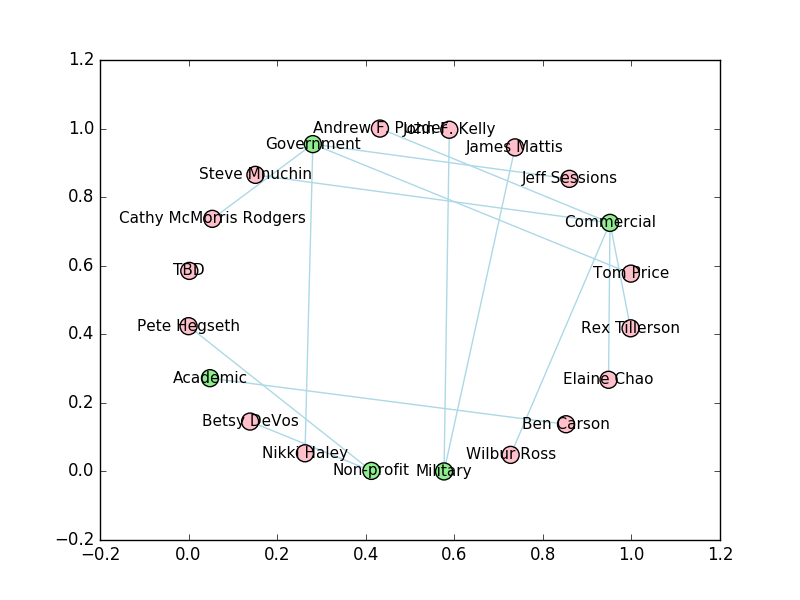

In [56]:
graphFile = imageDest + "DittenhaferHink-DATA620-FinalProj-OrgTypeGraph.png"
nx.write_graphml(gxOrgType, "../data/OrgTypeGraph.graphml")
nxh.renderGraph(gxOrgType, graphFile, False, top=people)

The following graph is a screenshot from Gephi. Blue nodes are organizatoin types, while red nodes are nominees.

![OrgTypeGraph](../images/DittenhaferHink-DATA620-FinalProj-Gephi-OrgTypeGraph.png)

#### Prior Position

The prior position is the position the nominee held or currently holds prior to the nomination.

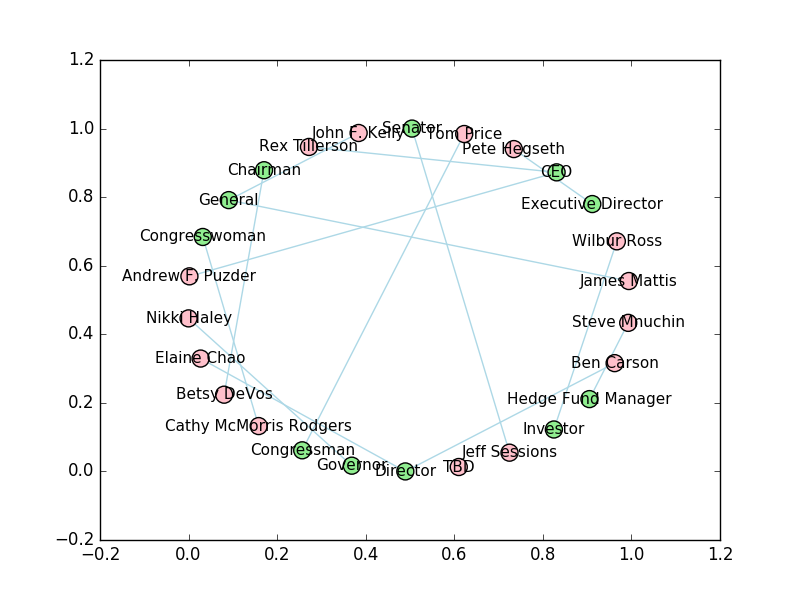

In [6]:
graphFile = imageDest + "DittenhaferHink-DATA620-FinalProj-PriorPositionGraph.png"
nx.write_graphml(gxPriorPosition, "../data/PriorPositionGraph.graphml")
nxh.renderGraph(gxPriorPosition, graphFile, False, top=people)

The following graph shows Gephi output for the Prior Position graph. Again red nodes are nominees, while green nodes are their prior position title.

![PriorPositionGraph](../images/DittenhaferHink-DATA620-FinalProj-Gephi-PriorPositionGraph.png)

#### Prior Organization

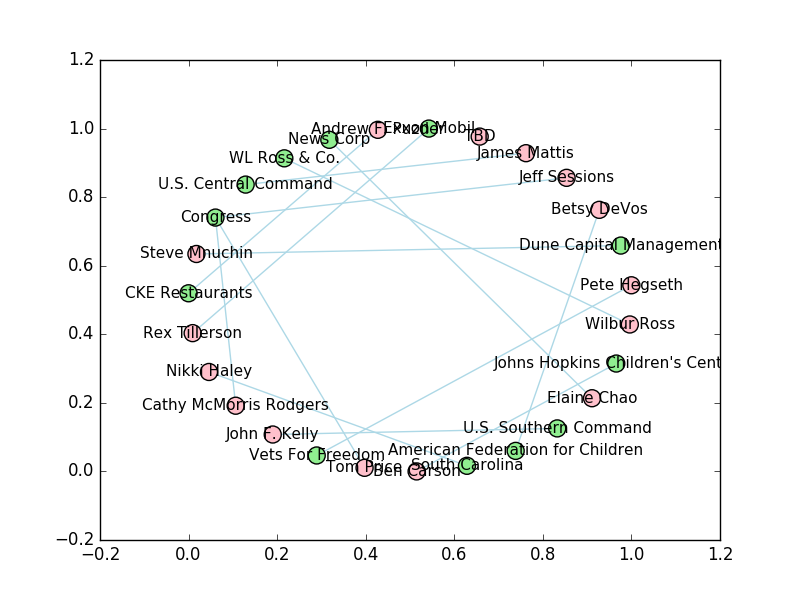

In [8]:
graphFile = imageDest + "DittenhaferHink-DATA620-FinalProj-OrgGraph.png"
nx.write_graphml(gxOrganization, "../data/OrgGraph.graphml")
nxh.renderGraph(gxOrganization, graphFile, False, top=people)

The following graph shows Gephi output for the Prior Organization graph. Again red nodes are nominees, while yellow nodes are their prior organization.

![PriorPositionGraph](../images/DittenhaferHink-DATA620-FinalProj-Gephi-OrgGraph.png)

#### Combined Graph

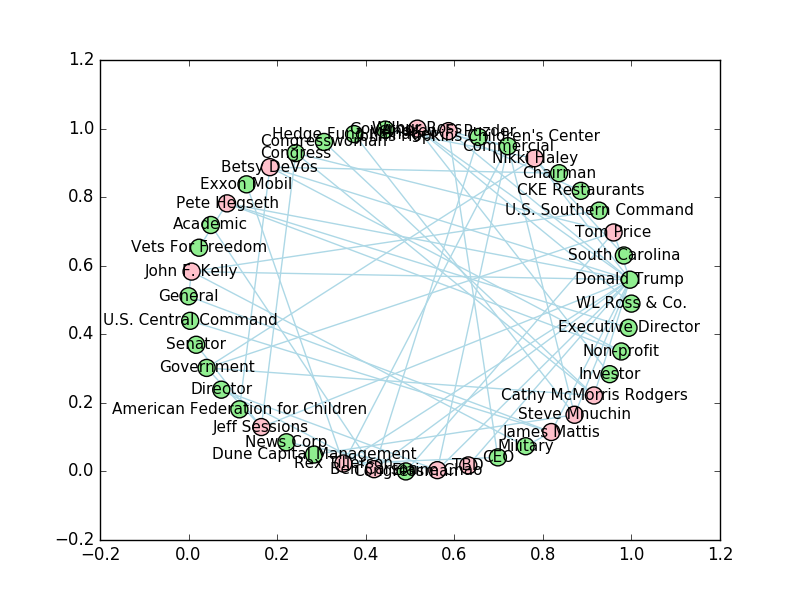

In [15]:
graphFile = imageDest + "DittenhaferHink-DATA620-FinalProj-CombinedGraph.png"
nx.write_graphml(gxCombined, "../data/CombinedGraph.graphml")
nxh.renderGraph(gxCombined, graphFile, False, top=people)

The following graph shows Gephi output for the combined graph. Nodes are color coded as previously described. The Network Diameter of this graph is 4.

![CombinedGraph](../images/DittenhaferHink-DATA620-FinalProj-Gephi-CombinedGraph.png)

## Sampling of Trump Twitter Followers

The python `twitter` api was used to acquire a sample of twitter followers. Given Mr. Trumps 17+ million followers, and twitter's rate limited API, it was not feasible to download the entire follower data set. Instead approximately 41,496 followers were downloaded. As the data set was downloaded, the language attribute (lang) appeared interesting. 

First we load the data and show the size of the list.

In [17]:
dataFile = "../data/trump_followers_plus.csv"
twDataset = []
with open( dataFile, "rb" ) as theFile:
    reader = csv.DictReader( theFile )
    for line in reader:
        twDataset.append(line)

In [18]:
twDataset[0]
print (len(twDataset))

41496


In the following code segment, the data is broken down into a language distribution dictionary and then sorted by most frequent language.

In [19]:
import operator
# Extract out the language counts
langDict = collections.defaultdict(int)
for f in twDataset:
    langDict[f["lang"]] += 1
    
langDict = collections.OrderedDict(sorted(langDict.items(), key=lambda x: x[1], reverse=True))
#= sorted(langDict.items(), key=operator.itemgetter(1))
print langDict

OrderedDict([('en', 30799), ('es', 1204), ('ru', 1176), ('vi', 1070), ('fr', 990), ('de', 713), ('ja', 639), ('ar', 623), ('tr', 620), ('zh-cn', 612), ('zh-CN', 477), ('en-gb', 435), ('pt', 393), ('it', 218), ('id', 186), ('nl', 174), ('zh-tw', 143), ('sv', 132), ('pl', 119), ('zh-TW', 75), ('ko', 70), ('en-GB', 59), ('th', 55), ('fa', 51), ('fi', 51), ('da', 50), ('he', 46), ('cs', 38), ('zh-Hans', 36), ('hu', 35), ('el', 33), ('ro', 30), ('uk', 28), ('no', 21), ('sr', 15), ('bg', 14), ('hr', 13), ('hi', 12), ('sk', 8), ('zh-Hant', 6), ('ca', 5), ('en-AU', 3), ('ur', 3), ('es-MX', 2), ('nb', 2), ('lv', 2), ('ta', 2), ('xx-lc', 2), ('fil', 2), ('en-IN', 1), ('zh', 1), ('bn', 1), ('sq', 1)])


Finally, the following code segment uses `matplotlib` to produce a bar chart of the language distribution. English (en) is the most popular, with Spanish (es) in second place. Interestingly, __Russian (ru)__ is in third place.

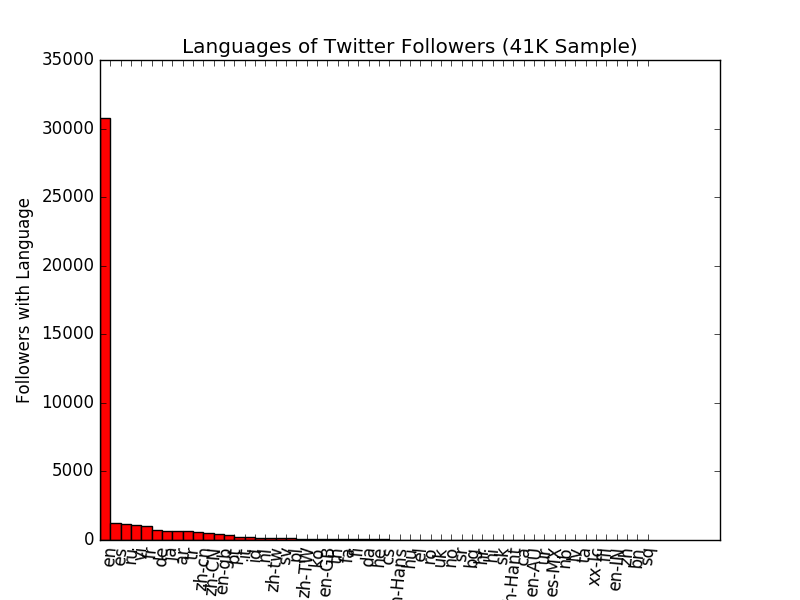

In [20]:
fig, ax = plt.subplots()
width = 1
ind = np.arange(len(langDict)) 
rects1 = ax.bar(ind, langDict.values(), width, color='r')

# add some text for labels, title and axes ticks
ax.set_ylabel('Followers with Language')
ax.set_title('Languages of Twitter Followers (41K Sample)')
ax.set_xticks(ind + width)
ax.set_xticklabels(langDict.keys(), rotation=85)

plt.savefig("../images/twitterFollowLang2.png")

from PIL import Image
im = Image.open("../images/twitterFollowLang2.png")
im

Next, the follower graph by language was created and saved to graphml for use in Gephi.

In [26]:
gxSomeFollowers = makeGraph(twDataset[0:50], "screen_name", "lang")

In [27]:
nx.write_graphml(gxSomeFollowers, "../data/SomeTwitterFollowers.graphml")

The following graph shows Gephi output for the top 50 followers of our sample by language. Follower nodes are red, while languages are green. Notice that by follower count, Russian language is not in the top 50.

![TwitterLangSampleGraph](../images/DittenhaferHink-DATA620-FinalProj-Gephi-TwitterLangSample.png)

# Text Analyis of Cabinet Related Wikipedia Articles

Not surprisingly, each of the members of President Elect Trump's cabinet has a fairly significant Wikipedia page dedicated to them.  For the second part of the project, we decided to scrape these articles and examine them for any obvious themes.

Perhaps the easiest way to do this is with a visual examination.  "Wordclouds" are a popular way to visualize corpora.  The following class provides a simple interface to convert a valid wikipedia url into a wordcloud.

The libraries BeautifulSoup and Wordcloud are wrapped and leveraged by this class.

In [3]:
from wordcloud import WordCloud, STOPWORDS
from bs4 import BeautifulSoup
import urllib2

In [21]:
class WikiWordCloudGenerator(object):
    """Class that provided utilities to generate word clouds from Wikipedia URLs"""

    """generate a wordcloud image from a single wikipedia url"""
    def generate_wordcloud_from_url(self, wiki_url, image_output_file_name):
        raw_text = self.generate_text_from_url(wiki_url)
        self.generate_wordcloud_from_text(raw_text, image_output_file_name)

    """generate a wordcloud image from a string"""
    def generate_wordcloud_from_text(self, text_to_process, image_output_file_name, custom_stop_words):
        # Generate a word cloud image
        stopwords = set(STOPWORDS)
        stopwords.add("retrieved")
        stopwords.add("ext")
        stopwords.add("state")
        stopwords.add("new")
        stopwords.add("ready")
        stopwords.add("true")
        stopwords.add("edit")
        for sw in custom_stop_words:
            stopwords.add(sw.lower())
        wordcloud = WordCloud(stopwords=stopwords).generate(text_to_process)

        # Display the generated image:
        import matplotlib.pyplot as plt
        plt.imshow(wordcloud)
        plt.axis("off")
        if image_output_file_name:
            plt.savefig(image_output_file_name)
        else:
            plt.show()

    """generate a wordcloud image from a multiple wikipedia urls"""
    def generate_wordcloud_from_multiple_urls(self, wiki_urls, image_output_file_name, custom_stop_words):
        all_raw_text = []
        for url in wiki_urls:
            all_raw_text.append(self.generate_text_from_url(url))

        all_flattened = ''.join(all_raw_text)
        self.generate_wordcloud_from_text(all_flattened, image_output_file_name, custom_stop_words)

    """grabs text from a single url"""
    def generate_text_from_url(self, wiki_url):
        header = {'User-Agent': 'Mozilla/5.0'} # Needed to prevent 403 error on Wikipedia
        req = urllib2.Request(wiki_url,headers=header)
        page = urllib2.urlopen(req)
        soup = BeautifulSoup(page)
        return soup.text

    def get_combined_scraped_text(self, wiki_urls):
        all_raw_text = []
        for url in wiki_urls:
            all_raw_text.append(self.generate_text_from_url(url))

        all_flattened = ''.join(all_raw_text)
        return all_flattened

# instantiate
wc_generator = WikiWordCloudGenerator()

The class provides interfaces to take any number of urls and convert them into an aggregated word cloud.  The wordcloud can be either saved as an image or, by default, printed out inline.

In addition, a customized set of stopwords can be specified for each run of the code.  (A stopword is a word you explicitly do not want to be a part of the word cloud).

In the following sections, we generate individualized wordcloud visuals for each cabinet member.  In each case, the member's first and last names are specified as stopwords.  In previous runs where the names were not specified as stopwords, they tended to dominate the image and indirectly mask each member's background/ties which is what we're actually more interested in.  


### Jeff Sessions

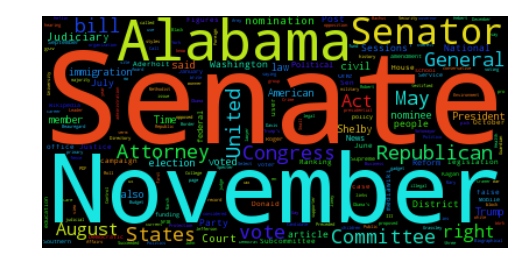

In [22]:
wc_generator.generate_wordcloud_from_multiple_urls(["http://en.wikipedia.org/wiki/Jeff_Sessions"], "", ['jeff', 'sessions'])

### James Mattis

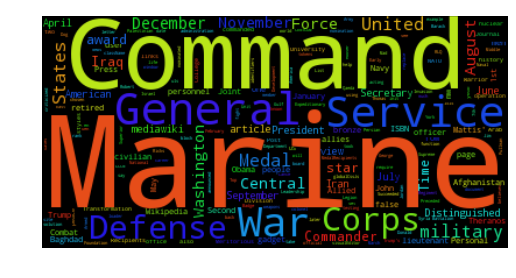

In [23]:
wc_generator.generate_wordcloud_from_multiple_urls(["http://en.wikipedia.org/wiki/James_Mattis"], "", ['james', 'mattis'])

### Tom Price

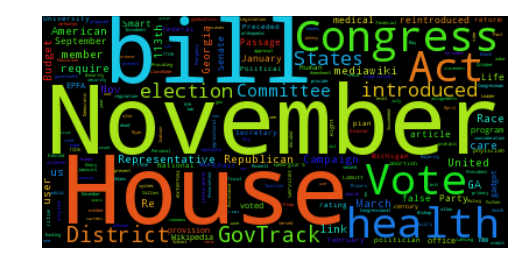

In [24]:
wc_generator.generate_wordcloud_from_multiple_urls(["http://en.wikipedia.org/wiki/Tom_Price_(U.S._politician)"], "", ['tom', 'price'])

### Ben Carson

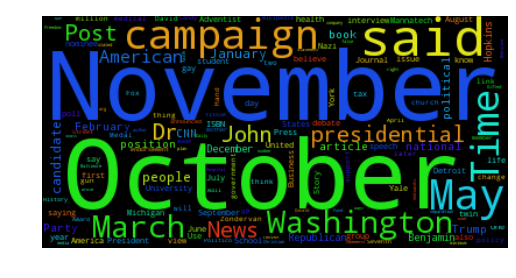

In [25]:
wc_generator.generate_wordcloud_from_multiple_urls(["http://en.wikipedia.org/wiki/Ben_Carson"], "", ['ben', 'carson', "carson's"])

### Betsy Devos

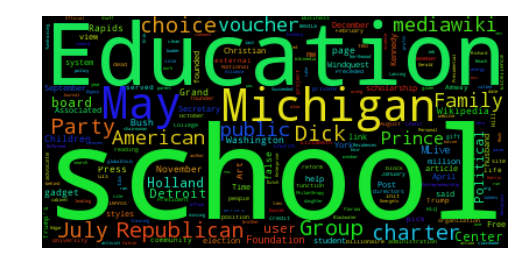

In [26]:
wc_generator.generate_wordcloud_from_multiple_urls(["http://en.wikipedia.org/wiki/Betsy_DeVos"], "", ['betsy', 'devos'])

### Nikki Haley

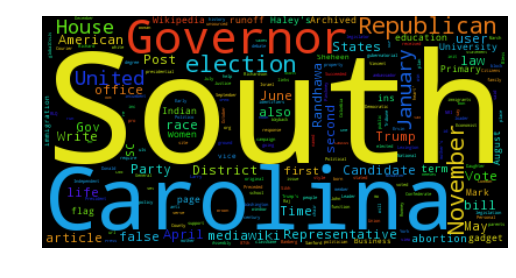

In [27]:
wc_generator.generate_wordcloud_from_multiple_urls(["http://en.wikipedia.org/wiki/Nikki_Haley"], "", ['nikki', 'haley'])

### Elaine Chao

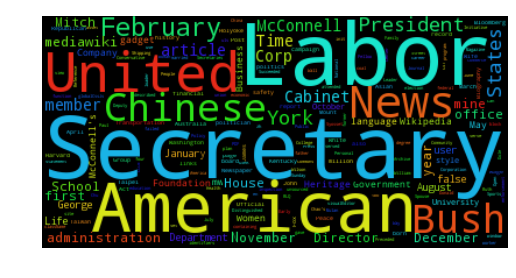

In [28]:
wc_generator.generate_wordcloud_from_multiple_urls(["http://en.wikipedia.org/wiki/Elaine_Chao"], "", ['elaine', 'chao'])

### Steven Mnuchin

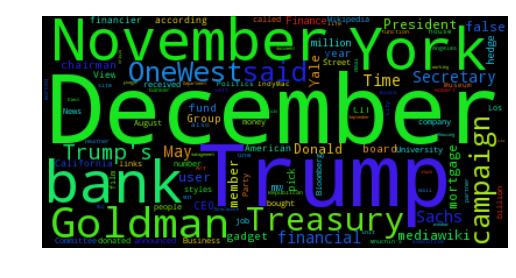

In [29]:
wc_generator.generate_wordcloud_from_multiple_urls(["http://en.wikipedia.org/wiki/Steven_Mnuchin"], "", ['steven', 'mnuchin'])

### Wilbur Ross

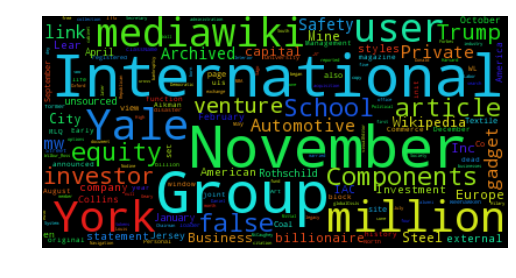

In [30]:
wc_generator.generate_wordcloud_from_multiple_urls(["http://en.wikipedia.org/wiki/Wilbur_Ross"], "", ['wilbur', 'ross'])

### Rex Tillerson

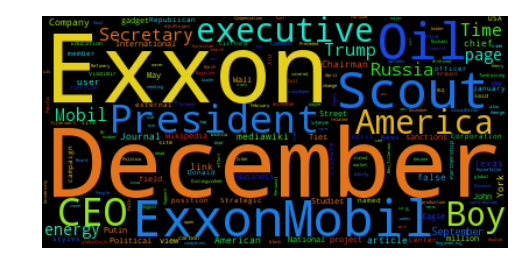

In [31]:
wc_generator.generate_wordcloud_from_multiple_urls(["http://en.wikipedia.org/wiki/Rex_Tillerson"], "", ['rex', 'tillerson'])

### Cathy McMorris Rodgers

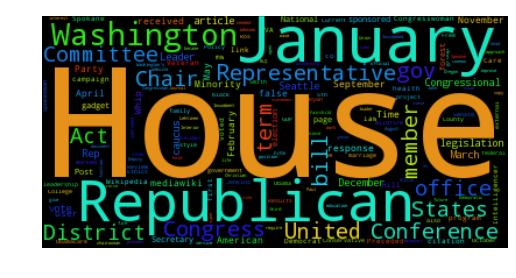

In [32]:
wc_generator.generate_wordcloud_from_multiple_urls(["http://en.wikipedia.org/wiki/Cathy_McMorris_Rodgers"], "", ['cathy', 'rodgers', 'mcmorris'])

### Pete Hegseth

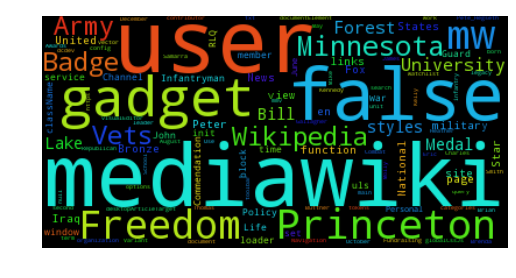

In [33]:
wc_generator.generate_wordcloud_from_multiple_urls(["http://en.wikipedia.org/wiki/Pete_Hegseth"], "", ['pete', 'hegseth'])

### Andrew Puzder

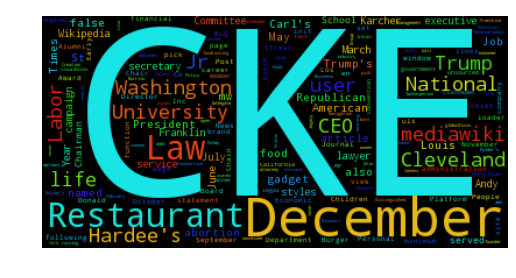

In [34]:
wc_generator.generate_wordcloud_from_multiple_urls(["http://en.wikipedia.org/wiki/Andrew_Puzder"], "", ['andrew', 'puzder'])

In general, it looks as though the wordcloud generator has done a good job of providing a visual summary index of each of the cabinet member's backgrounds.  For example,  we can see clearly how prominent Exxon is in soon to be secretary of state Rex Tillerson's background.  Betsy Davos's background clearly comes from the education world and we can quickly see the financiers in the group (Ross, Mnuchin).  Jeff Mattis rose to power through the millitary and that's readily apparent from his generated image. 

### All Cabinet Members

As mentioned, the wordcloud generator can aggregate multiple wikipedia articles into a single word cloud.  Lets now use that feature to see what a combined image for all cabinet members looks like.

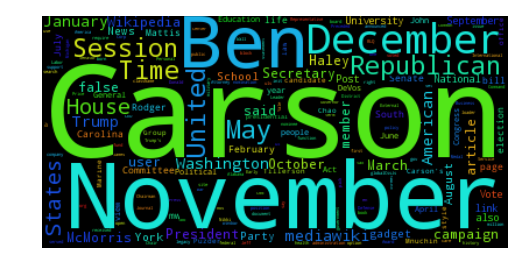

In [35]:
members_urls = ["http://en.wikipedia.org/wiki/Jeff_Sessions",
"http://en.wikipedia.org/wiki/James_Mattis",
"http://en.wikipedia.org/wiki/Tom_Price_(U.S._politician)",
"http://en.wikipedia.org/wiki/Ben_Carson",
"http://en.wikipedia.org/wiki/Betsy_DeVos",
"http://en.wikipedia.org/wiki/Nikki_Haley",
"http://en.wikipedia.org/wiki/Elaine_Chao",
"http://en.wikipedia.org/wiki/Steven_Mnuchin",
"http://en.wikipedia.org/wiki/Wilbur_Ross",
"http://en.wikipedia.org/wiki/Rex_Tillerson",
"http://en.wikipedia.org/wiki/Cathy_McMorris_Rodgers",
"http://en.wikipedia.org/wiki/Pete_Hegseth",
"http://en.wikipedia.org/wiki/Andrew_Puzder"
]

wc_generator.generate_wordcloud_from_multiple_urls(members_urls, "", [])

It's quite striking how often Ben Carson's name appears across all articles.  Either he is a central figure in the cabinet or there's a bias to mentioning him by name (for some reason).  His Wikipedia article is longer than the other members but not by the orders of magnitude the word cloud would lead us to believe.  This is an interesting result.

### All Cabinet Members' Directly Related Organizations

Similarly, lets construct a wordcloud for all the cabinet member's primary organzitions in their pre-Trump cabinet life.

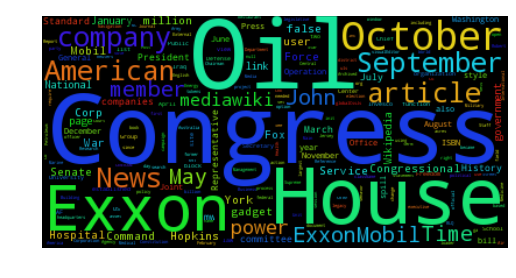

In [36]:
orgs_urls = [
"https://en.wikipedia.org/wiki/United_States_Congress",
"https://en.wikipedia.org/wiki/United_States_Central_Command",
"https://en.wikipedia.org/wiki/Johns_Hopkins_Hospital",
"https://en.wikipedia.org/wiki/Alliance_for_School_Choice",
"https://en.wikipedia.org/wiki/News_Corp",
"https://en.wikipedia.org/wiki/Invesco",
"https://en.wikipedia.org/wiki/ExxonMobil",
"https://en.wikipedia.org/wiki/Vets_For_Freedom",
"https://en.wikipedia.org/wiki/CKE_Restaurants"
]

wc_generator.generate_wordcloud_from_multiple_urls(orgs_urls, "", ['united', 'states'])

Oil.

That's not super surpising.  It must be noted here that the effect here is exaggerated as Exxon's article length exceed all others except for Congress.  Regardless, oil is mentioned througout a number of the other articles.  I don't think that saying that oil having some relationship to the American power structure is that controversial or off base.

### Members + Organizations

The last word cloud we'll create is one that aggregates all articles - both personal and organization.

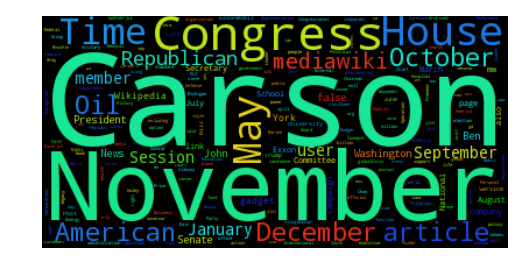

In [37]:
wc_generator.generate_wordcloud_from_multiple_urls(members_urls+orgs_urls, "", ['united', 'states'])

Here again we see Mr. Carson's prominence.

It's also interesting how oftenthe month of November shows up (we saw this too in the members only wordcloud).  It probably makes good sense as November is election time and these are obviously all political figures.

### Text Distribution

Almost as an aside to the main portion of this project, we wanted to take a look at the aggregated wikipedia text and see how the words were distributed and specifically if they followed Zipf's law.

The following code does that for all of the articles in the above sections.

In [8]:
try:
    import nltk
    from nltk.corpus import stopwords
except:
    print 'import nltk error'
import string
import pandas as pd
import pylab
import matplotlib.pyplot as plt

In [11]:
# clean up wiki scraped text
wiki_raw = wc_generator.get_combined_scraped_text(members_urls+orgs_urls)
wiki_raw = ''.join([i for i in wiki_raw if not i.isdigit()])
wiki_raw = ''.join([i if ord(i) < 128 else '' for i in wiki_raw])
wiki_raw = wiki_raw.encode("utf-8").split()
s=set(stopwords.words('english'))
s.add('retrieved')
wiki_raw = filter(lambda w: not w in s, wiki_raw)

wiki_unique = set()
wiki_all_filtered = []
table = string.maketrans("","")
def trans_punc(s):
    return s.translate(table, string.punctuation)
for w in wiki_raw:
    try:
        trans = trans_punc(str(w.lower()))
        # filter out empty strings
        if trans:
            wiki_unique.add(trans)
            wiki_all_filtered.append(trans)
    except Exception:
        pass

In [12]:
print('Total Number of Words: %i' % len(wiki_all_filtered))

print('Number of Unique Words: %i' % len(wiki_unique))

Total Number of Words: 78355
Number of Unique Words: 13119


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


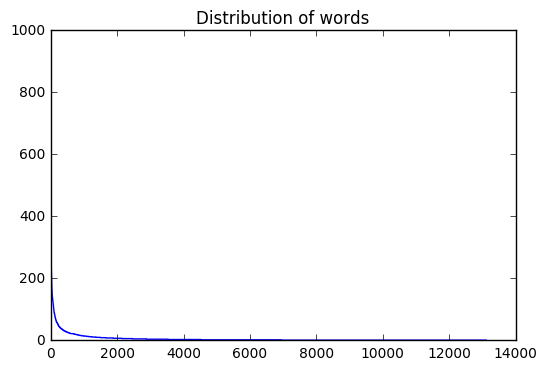

In [13]:
fd = nltk.FreqDist([w.lower() for w in wiki_all_filtered])

# translate results into pandas dataframe
wiki_df = pd.DataFrame(fd.items(), columns=['Word', 'Frequency'])
wiki_df = wiki_df.sort(['Frequency'], ascending=[0])

# plot top 200 words frequency
plt.title("Distribution of words")
plt.plot(list(wiki_df['Frequency']))
plt.show()

In [15]:
wiki_df['CummSum'] = wiki_df['Frequency'].cumsum()
wiki_df['GtHalf'] = wiki_df['CummSum'] > (len(wiki_all_filtered) / 2.0)
wiki_df.index = range(1,len(wiki_df) + 1)

print wiki_df.head(20)

# note there is a bug when running in a jupyter notebook.  The stopwords given to nltk are ignored.  
# This problem does not occur when the same code is run outside a notebook environment
# Words below such as "retrieved", "the" and "b" should be filtered out.

          Word  Frequency  CummSum GtHalf
1    retrieved       1000     1000  False
2          the        935     1935  False
3       carson        514     2449  False
4           in        485     2934  False
5       states        432     3366  False
6       united        425     3791  False
7     november        399     4190  False
8     congress        396     4586  False
9          new        348     4934  False
10          us        321     5255  False
11       house        296     5551  False
12           b        280     5831  False
13         may        279     6110  False
14    december        261     6371  False
15     october        260     6631  False
16         oil        255     6886  False
17         ben        235     7121  False
18        news        233     7354  False
19  washington        233     7587  False
20   september        231     7818  False


In [16]:
# find how many words sum to be half of the total words
half_point = wiki_df['GtHalf'] == True
print wiki_df[half_point].head(1)

         Word  Frequency  CummSum GtHalf
586  preceded         23    39192   True


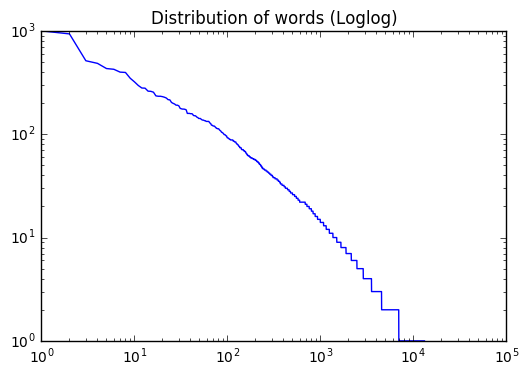

In [17]:
# show zipf trend
plt.title("Distribution of words (Loglog)")
plt.loglog(wiki_df.index,wiki_df['Frequency'])
plt.show()

As shown in both plots in this section, the words in the aggregation of all articles look to be power law distributed (the Zipfian distribution is one such distribution).  The second plot is not quite linear (which would indicate perfect adherence to Zipf's law) but it is not enough of a deviation to reject the notion that this text is distributed in any peculiar fashion.